"Banglore Home Price Prediction DS_ML(API_HTML) Project"

Aim : Create an API based html link to predict home price

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data Extraction and Loading to the system

In [101]:
df1 = pd.read_csv('banglore_home_price_data.csv')
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [102]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [103]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [104]:
df1.shape

(13320, 9)

In [105]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [106]:
df1.groupby('availability')['availability'].agg('count')

availability
14-Jul                      1
14-Nov                      1
15-Aug                      1
15-Dec                      1
15-Jun                      1
                        ...  
22-Mar                      3
22-May                     10
22-Nov                      2
Immediate Possession       16
Ready To Move           10581
Name: availability, Length: 81, dtype: int64

In [107]:
df1.groupby('location')['location'].agg('count')

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1305, dtype: int64

In [108]:
df1.groupby('society')['society'].agg('count')

society
3Codeli    2
7 ise P    1
A idse     2
A rtsai    1
ACersd     1
          ..
Zonce E    2
Zostaa     3
i1ncyRe    1
i1odsne    1
i1rtsCo    3
Name: society, Length: 2688, dtype: int64

### Data Cleaning

In [109]:
df2 = df1.drop(['area_type', 'availability', 'society'], axis = 'columns')
df2.head(2)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00


In [110]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [111]:
df2['balcony'].fillna(1, inplace = True)

In [112]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [113]:
df2['bath'].fillna(df2['bath'].median(), inplace = True)

In [114]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
balcony        0
price          0
dtype: int64

In [115]:
df2.dropna(inplace = True)
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [116]:
df2.shape

(13303, 6)

In [117]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [118]:
len(df2['size'].unique())

31

## Feature Engineering

In [119]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head(2)

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4


In [120]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [121]:
len(df2['bhk'].unique())

19

In [122]:
df2['bhk'].describe()

count    13303.000000
mean         2.803728
std          1.295022
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         43.000000
Name: bhk, dtype: float64

In [123]:
df2['bhk'][df2['bhk']>20]

1718    27
4684    43
Name: bhk, dtype: int64

In [124]:
df2[df2['bhk']>20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [125]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [126]:
df2['total_sqft'].describe()

count     13303
unique     2110
top        1200
freq        843
Name: total_sqft, dtype: object

In [127]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [128]:
df2[~df2['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,1.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,1.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
...,...,...,...,...,...,...,...
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13240,Devanahalli,1 BHK,1020 - 1130,2.0,1.0,52.570,1
13265,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [129]:
df2[~df2['total_sqft'].apply(is_float)][7:20]

,location,size,total_sqft,bath,balcony,price,bhk
224,Devanahalli,3 BHK,1520 - 1740,2.0,1.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,1.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
669,JP Nagar,5 BHK,4400 - 6640,2.0,1.0,375.000,5
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
702,JP Nagar,5 BHK,4400 - 6800,2.0,1.0,548.500,5
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2
775,Basavanagara,1 BHK,1000Sq. Meter,2.0,1.0,93.000,1


In [130]:
df2.iloc[410], df2.iloc[648], df2.iloc[773], df2.iloc[870]

(location             Kengeri
 size                   1 BHK
 total_sqft    34.46Sq. Meter
 bath                       1
 balcony                    0
 price                   18.5
 bhk                        1
 Name: 410, dtype: object,
 location      Sarjapur
 size             2 BHK
 total_sqft        1128
 bath                 2
 balcony              1
 price               60
 bhk                  2
 Name: 650, dtype: object,
 location       Basavanagara
 size                  1 BHK
 total_sqft    1000Sq. Meter
 bath                      2
 balcony                   1
 price                    93
 bhk                       1
 Name: 775, dtype: object,
 location      Singapura Village
 size                      2 BHK
 total_sqft        1100Sq. Yards
 bath                          2
 balcony                       1
 price                        45
 bhk                           2
 Name: 872, dtype: object)

In [131]:
df2.iloc[646]

location        Arekere
size          9 Bedroom
total_sqft    4125Perch
bath                  9
balcony               1
price               265
bhk                   9
Name: 648, dtype: object

In [132]:
def convert_total_sqft_to_num(x):
    tockens = x.split('-')
    if len(tockens)==2:
        return (float(tockens[0]) + float(tockens[1]))/2
    try:
        return float(x)
    except:
        return None

In [133]:
convert_total_sqft_to_num('203000')

203000.0

In [134]:
convert_total_sqft_to_num('100 - 500')

300.0

In [135]:
convert_total_sqft_to_num('1000Sq. Meter')

In [136]:
total_sqft = ['34.46Sq. Meter', '4125Perch', '1000Sq. Meter', '1100Sq. Yards']
converted_num = list(map(convert_total_sqft_to_num, total_sqft))
converted_num

[None, None, None, None]

In [137]:
total_sqft = ['100-300', '1000-3050', '1000-8500']
converted_num = list(map(convert_total_sqft_to_num, total_sqft))
converted_num

[200.0, 2025.0, 4750.0]

In [138]:
df2['total_sqft'] = df2['total_sqft'].apply(convert_total_sqft_to_num)

In [139]:
df2

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,1.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4


In [140]:
df3 = df2.copy()

In [141]:
df3['price_per_srft'] = df3['price']*100000/df3['total_sqft']

In [142]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_srft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [143]:
df3.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [144]:
len(df3.location.unique())

1304

##  Dimensionality Reduction

In [145]:
df3.location = df3.location.apply(lambda x: x.strip())
location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield           540
Sarjapur  Road       397
Electronic City      304
Kanakpura Road       273
Thanisandra          237
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [146]:
len(location_stats[location_stats<5])

852

In [147]:
location_stats_less_than_5 = location_stats[location_stats<5]
location_stats_less_than_5

location
tc.palya               4
Kodathi                4
Lakshmi Layout         4
4th Block Jayanagar    4
Mysore Highway         4
                      ..
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 852, dtype: int64

In [148]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_stats_less_than_5 else x)
len(df3.location.unique())

442

In [150]:
df3.head(10)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_srft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,1.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,1.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,1.0,370.00,6,36274.509804


## Outlier Detection and Removal

In [151]:
Whitefielddf3[df3['total_sqft']/df3['bhk']<200].head(10)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_srft
9,other,6 Bedroom,1020.0,6.0,1.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,1.0,200.0,8,33333.333333
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,0.0,115.0,7,12105.263158
149,other,6 Bedroom,1034.0,5.0,1.0,185.0,6,17891.682785
176,Kumaraswami Layout,5 Bedroom,600.0,3.0,2.0,85.0,5,14166.666667
349,other,3 Bedroom,11.0,3.0,2.0,74.0,3,672727.272727


In [154]:
len(df3[df3['total_sqft']/df3['bhk']<200])

340

In [155]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13303 non-null  object 
 1   size            13303 non-null  object 
 2   total_sqft      13257 non-null  float64
 3   bath            13303 non-null  float64
 4   balcony         13303 non-null  float64
 5   price           13303 non-null  float64
 6   bhk             13303 non-null  int64  
 7   price_per_srft  13257 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 935.4+ KB


In [156]:
df3.shape

(13303, 8)

In [161]:
df3[~(df3['total_sqft']/df3['bhk']<200)]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_srft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,1.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319


In [162]:
df4 = df3[~(df3['total_sqft']/df3['bhk']<200)]
df4.shape

(12963, 8)

In [163]:
df4.price_per_srft.describe()

count     12917.000000
mean       6494.860520
std        4337.398168
min         267.829813
25%        4242.819843
50%        5357.142857
75%        7092.198582
max      176470.588235
Name: price_per_srft, dtype: float64

In [169]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, sub_df in df.groupby('location'):
        m = np.mean(sub_df.price_per_srft)
        sd = np.std(sub_df.price_per_srft)
        reduced_df = sub_df[(sub_df.price_per_srft>(m-sd)) & (sub_df.price_per_srft<=(m+sd))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

In [170]:
df5 = remove_pps_outliers(df4)

In [171]:
df5.shape

(10373, 8)

In [179]:
df5.rename({'price_per_srft':'price_per_sqft'}, axis = 1, inplace = True)

In [185]:
import matplotlib
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, marker = 'o', color = 'r', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, marker = '*', color = 'g', label = '3 BHK', s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

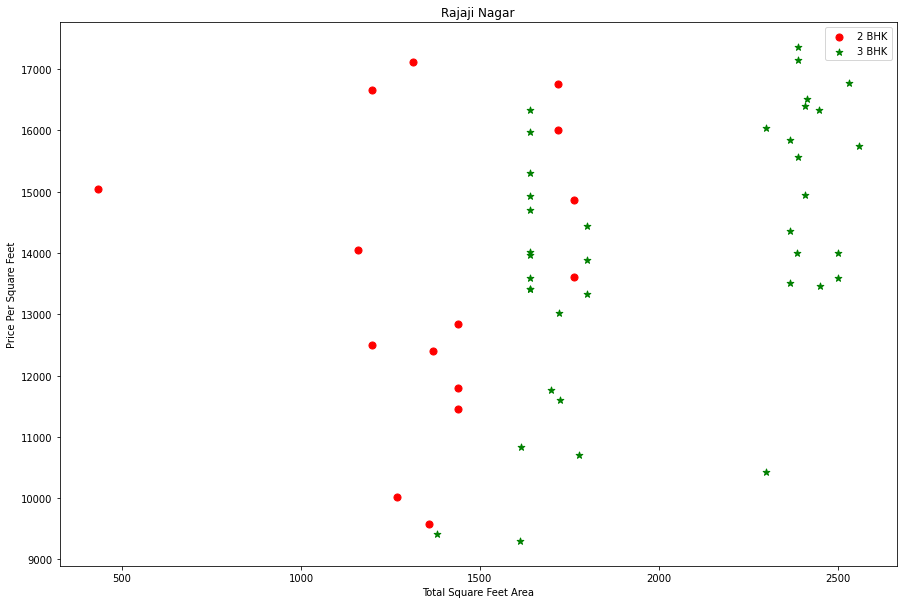

In [186]:
plot_scatter_chart(df5, 'Rajaji Nagar')

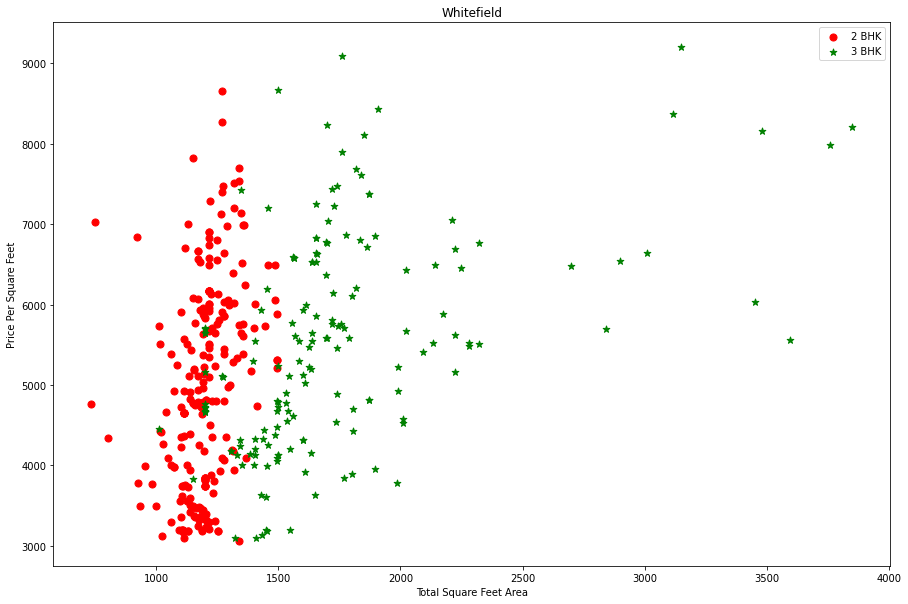

In [187]:
plot_scatter_chart(df5, 'Whitefield')

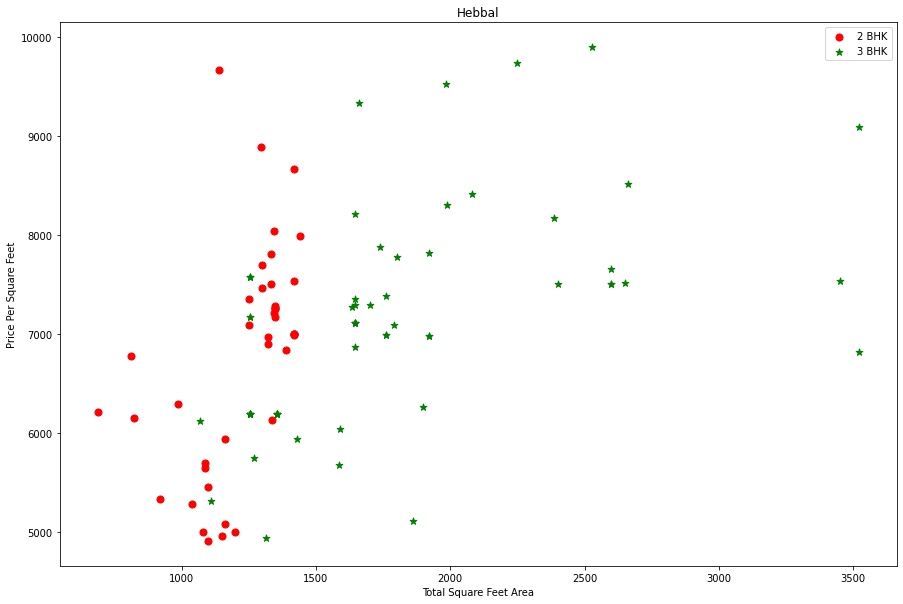

In [188]:
plot_scatter_chart(df5, 'Hebbal')

### Outliers Removal


In [190]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [191]:
df6 = remove_bhk_outliers(df5)
df6.shape

(7946, 8)

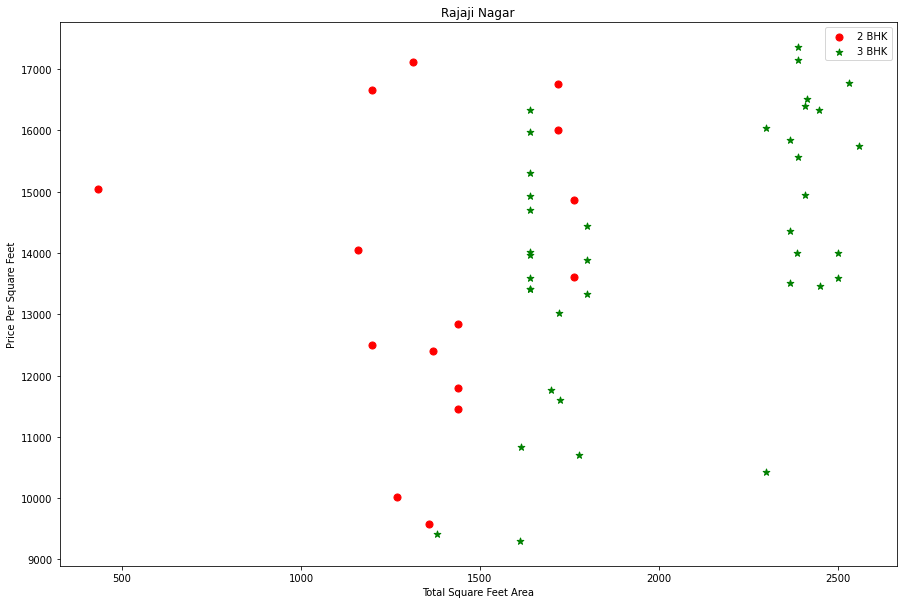

In [196]:
plot_scatter_chart(df5, 'Rajaji Nagar')

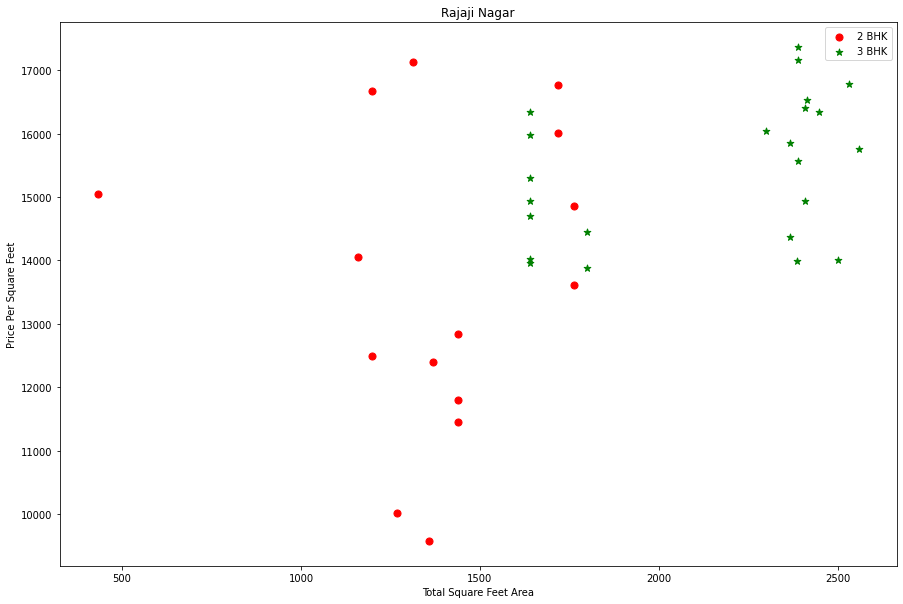

In [195]:
plot_scatter_chart(df6, 'Rajaji Nagar')

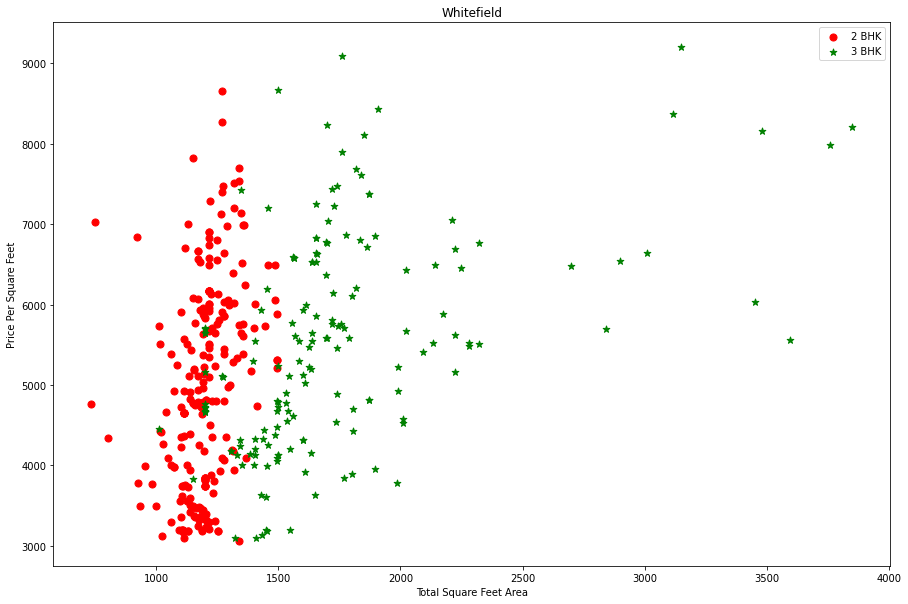

In [193]:
plot_scatter_chart(df5, 'Whitefield')

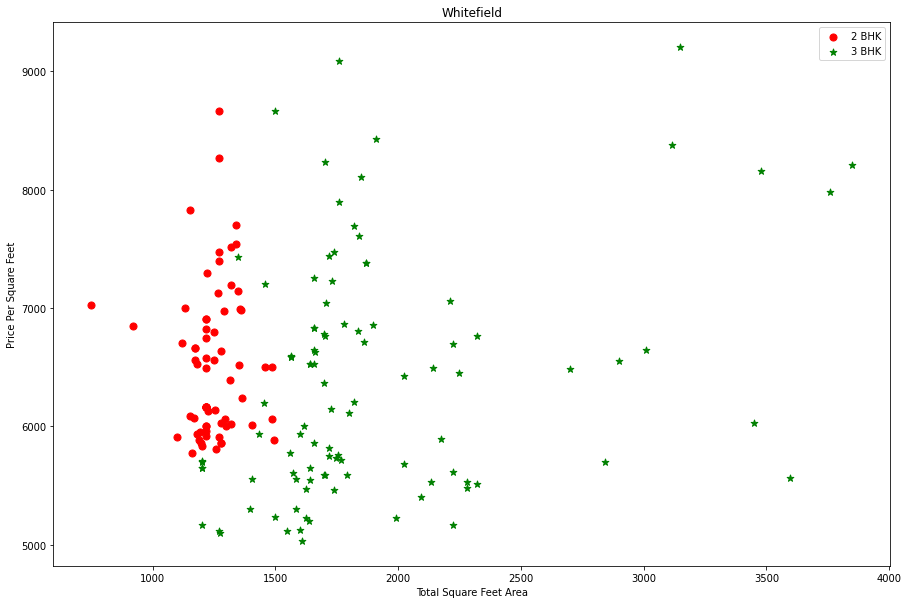

In [197]:
plot_scatter_chart(df6, 'Whitefield')

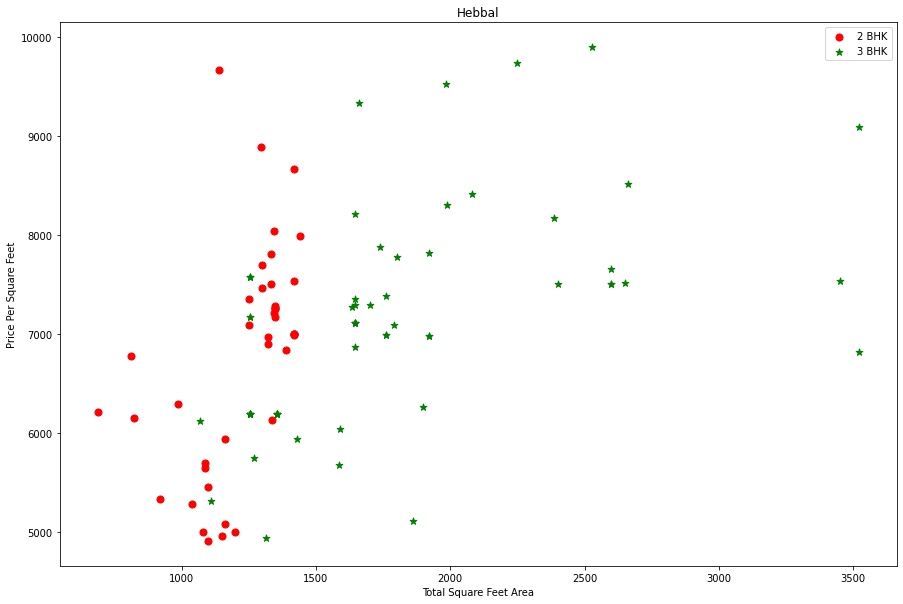

In [194]:
plot_scatter_chart(df5, 'Hebbal')

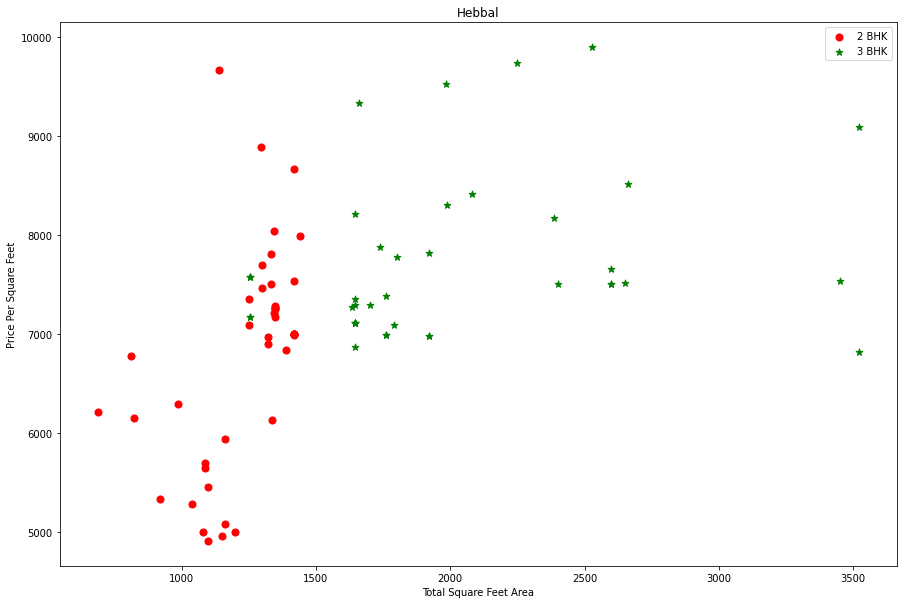

In [198]:
plot_scatter_chart(df6, 'Hebbal')

Text(0, 0.5, 'Count')

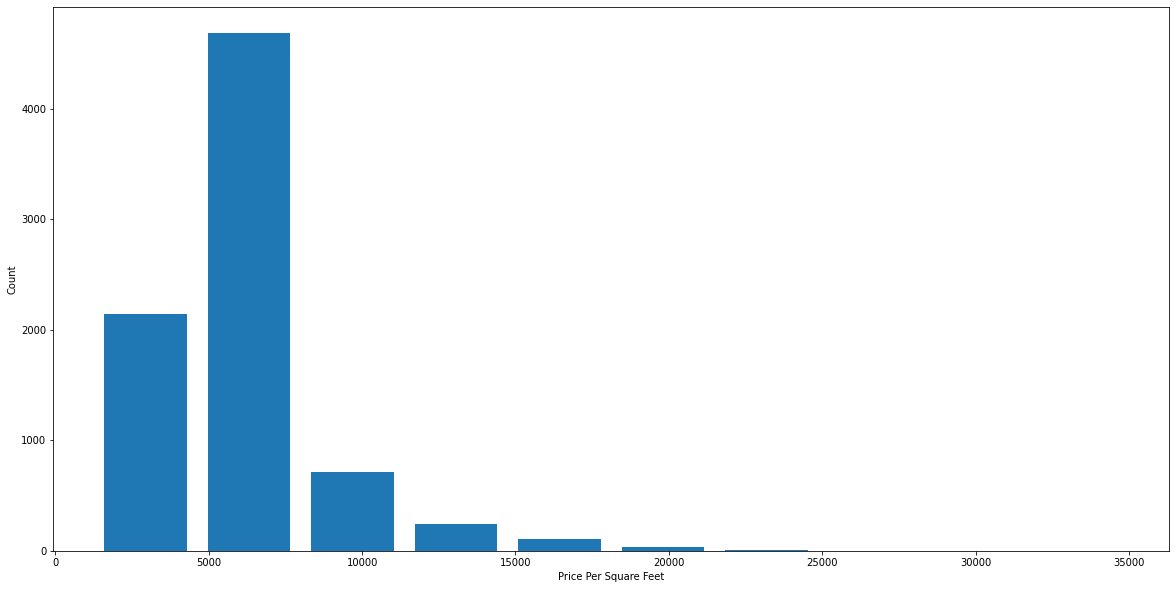

In [199]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [200]:
df6.bath.unique()

array([ 7.,  3.,  4.,  6.,  2.,  5.,  1.,  8.,  9., 14., 12., 10., 27.,
       16., 13.])

In [201]:
df6[df6.bath>10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
724,BTM 1st Stage,9 Bedroom,3300.0,14.0,1.0,500.0,9,15151.515152
6147,Neeladri Nagar,10 BHK,4000.0,12.0,1.0,160.0,10,4000.000000
8845,Wilson Garden,8 Bedroom,1850.0,12.0,1.0,300.0,8,16216.216216
9339,other,27 BHK,8000.0,27.0,0.0,230.0,27,2875.000000
9452,other,10 BHK,12000.0,12.0,1.0,525.0,10,4375.000000
9502,other,16 BHK,10000.0,16.0,1.0,550.0,16,5500.000000
9865,other,11 BHK,6000.0,12.0,1.0,150.0,11,2500.000000
10041,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

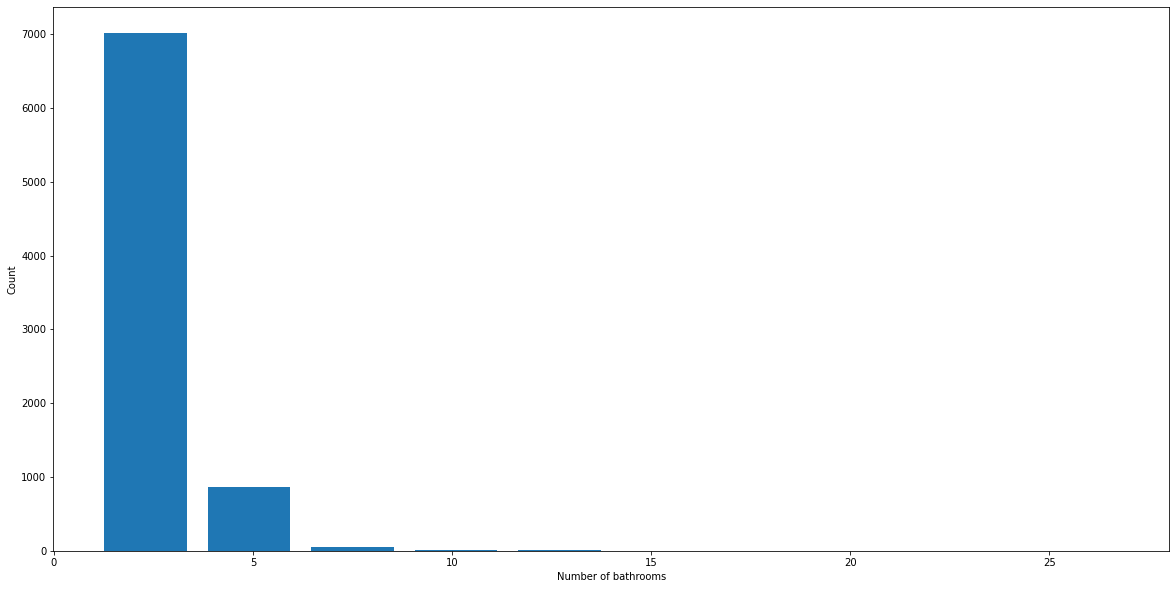

In [203]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [204]:
df6[df6.bath>df6.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
724,BTM 1st Stage,9 Bedroom,3300.0,14.0,1.0,500.0,9,15151.515152
1791,Chamrajpet,6 Bedroom,1500.0,9.0,3.0,230.0,6,15333.333333
1951,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6087,Nagasandra,4 Bedroom,7000.0,8.0,1.0,450.0,4,6428.571429
7349,Sathya Sai Layout,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689
7814,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8845,Wilson Garden,8 Bedroom,1850.0,12.0,1.0,300.0,8,16216.216216


In [205]:
df7 = df6[df6.bath<df6.bhk+2]

In [206]:
df7.shape

(7861, 8)

In [209]:
df8 = df7.drop(['size','price_per_sqft'],axis='columns')
df8.shape

(7861, 6)

In [208]:
df8.head(2)

,location,total_sqft,bath,balcony,price,bhk
0,1st Block HRBR Layout,2400.0,7.0,3.0,355.0,7
1,1st Block HRBR Layout,600.0,3.0,1.0,90.0,3


## Location  > text >> to >> Numeric 
#### by 
## The Use of One Hot Encoding

In [212]:
df9 = pd.get_dummies(df8.location)
df9.head()

,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,1st Stage Indira Nagar,2nd Block Hrbr Layout,2nd Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,3rd Block Banashankari,...,Volagerekallahalli,Whitefield,Wilson Garden,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [228]:
df10 = pd.concat([df8, df9.drop('other', axis = 1)], axis = 1)
df10.head(2)

,location,total_sqft,bath,balcony,price,bhk,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vittasandra,Volagerekallahalli,Whitefield,Wilson Garden,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur
0,1st Block HRBR Layout,2400.0,7.0,3.0,355.0,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block HRBR Layout,600.0,3.0,1.0,90.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [231]:
df10.drop('location', axis = 1, inplace = True)
df10.head(2)

,total_sqft,bath,balcony,price,bhk,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,1st Stage Indira Nagar,...,Vittasandra,Volagerekallahalli,Whitefield,Wilson Garden,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur
0,2400.0,7.0,3.0,355.0,7,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,600.0,3.0,1.0,90.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [232]:
df10.shape

(7861, 446)

## Model Training

In [233]:
X = df10.drop(['price'],axis=1)
X.head(2)

,total_sqft,bath,balcony,bhk,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,1st Stage Indira Nagar,2nd Block Hrbr Layout,...,Vittasandra,Volagerekallahalli,Whitefield,Wilson Garden,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur
0,2400.0,7.0,3.0,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,600.0,3.0,1.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Price is The Target Variable >>> y
and all others are feature >> x

In [234]:
y = df10.price
y.head(2)

0    355.0
1     90.0
Name: price, dtype: float64

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [236]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8478674890919721

## Use K Fold cross validation to measure accuracy of the LinearRegression model

In [239]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.78126825, 0.79311667, 0.74496228, 0.7620862 , 0.62288789])

## Find best model using GridSearchCV

In [241]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [242]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.740864,{'normalize': False}
1,lasso,0.620730,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.670564,"{'criterion': 'mse', 'splitter': 'random'}"


linear_regression best_score 0.740864 >> the best model in this case
### Predict y:

In [243]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', '1st Block HRBR Layout',
       '1st Block Jayanagar', '1st Block Koramangala', '1st Phase JP Nagar',
       '1st Stage Indira Nagar', '2nd Block Hrbr Layout',
       ...
       'Vittasandra', 'Volagerekallahalli', 'Whitefield', 'Wilson Garden',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yemlur', 'Yeshwanthpur'],
      dtype='object', length=445)

In [244]:
len(X.columns)

445

In [245]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

11

In [246]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [247]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

89.03867472466663

In [248]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

89.72166198181665

In [249]:
predict_price('Indira Nagar',1000, 4, 3)

198.92400538124377

## Save Model by Exporting the tained/tested model to a pickle file

In [250]:
import pickle
with open('bhp_prediction_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

### Export location and column information to a file that will be useful later on in our prediction application

In [251]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))